 # OUTTA AI 부트캠프 팀 프로젝트 실습 : GAN



<h4><div style="text-align: right"> Last Edit: Aug 04, 2023. </div> <br>

> ## 구글 드라이브를 연결하자.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> ## 그 후, 다음의 코드를 실행하여 실습에 사용할 데이터셋의 압축을 풀도록 하자.

In [ ]:
!cp /content/drive/MyDrive/Classroom/advanced/6/GAN_dataset.zip /content/
!unzip "/content/GAN_dataset.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: celebA/img/197605.jpg   
  inflating: celebA/img/197606.jpg   
  inflating: celebA/img/197607.jpg   
  inflating: celebA/img/197608.jpg   
  inflating: celebA/img/197609.jpg   
  inflating: celebA/img/197610.jpg   
  inflating: celebA/img/197611.jpg   
  inflating: celebA/img/197612.jpg   
  inflating: celebA/img/197613.jpg   
  inflating: celebA/img/197614.jpg   
  inflating: celebA/img/197615.jpg   
  inflating: celebA/img/197616.jpg   
  inflating: celebA/img/197617.jpg   
  inflating: celebA/img/197618.jpg   
  inflating: celebA/img/197619.jpg   
  inflating: celebA/img/197620.jpg   
  inflating: celebA/img/197621.jpg   
  inflating: celebA/img/197622.jpg   
  inflating: celebA/img/197623.jpg   
  inflating: celebA/img/197624.jpg   
  inflating: celebA/img/197625.jpg   
  inflating: celebA/img/197626.jpg   
  inflating: celebA/img/197627.jpg   
  inflating: celebA/img/197628.jpg   
  inflating: celebA/img/197629.jpg   
  inflating: c

## Generative Adversarial Network (GAN)

> **GAN은 adversarial process, 즉 적대적 프로세스를 통해 생성 샘플을 추정하는 framework이다.**
>
> 1. **Generative model G**
>   * 데이터 분포를 파악하여 샘플을 생성한다.</p>
>   * Discriminator를 속이는 것이 학습의 목표이다.
>   * 이는 마치 위조화폐 제작팀이라고 생각할 수 있다. 그들은 가짜 화폐를 만들어 감지되지 않으려 한다.
>
>
> 2. **Discriminative model D**
>   * 샘플이 실제 데이터셋에서 온 것인지, 생성 모델에서 온 것인지의 확률을 추정한다.</p>
>   * Discriminative 모델은 샘플이 모델이 생성한 분포에서 왔는지, 실제 데이터 분포에서 왔는지를 판단하도록 학습한다.
>   * 이는 마치 경찰에 비유할 수 있다. 그들은 위조 화폐를 탐지하려고 한다.
>
> <img src="https://drive.google.com/uc?export=view&id=19x0roNKu6up7yjOILbJq9ulgMMH7Vr3w" alt="no_image" style="width: 600px;"/>
> <img src="https://drive.google.com/uc?export=view&id=1-9hxJROsi7Rf7lHK-rh5dTxnw39V7moJ" alt="no_image" style="width: 900px;"/>


## 2. 첫 번째 실습 (GAN)
> **1.Dataset**
>
>   * MNIST 데이터셋을 생성해볼 것이다.
>   * MNIST 데이터셋은 28 X 28 이미지이다. 이 것을 784 사이즈의 벡터로 Resize 해주어야 한다.
>
> **2. Network**
>   * **Generativor G**
>     * Xavier 초기화를 사용한다.
>       * 이전 실습에서 사용하였던 초기화 기법이다.
>       * **nn.init.xavier_uniform_** 로 사용할 수 있다.
>     * Latent vector Z 가 input으로 사용된다. (size=100)
>     * hidden layer(size=128) 통과 이후에는 ReLU를 activation 함수로 사용한다.
>     * 최종 Output layer(size=28x28) 이후에는 sigmoid를 activation 함수로 사용한다.
>
>
>   * **Discriminativor D**
>     * 마찬가지로 Xavier 초기화를 사용한다.
>       * **nn.init.xavier_uniform_** 로 사용할 수 있다.
>     * 입력으로 Real 데이터 또는 Fake 데이터가 사용된다.
>     * hidden layer(size=128) 통과 이후에는 ReLU를 activation 함수로 사용한다.
>     * 최종 Output layer(size=1) 이후에는 sigmoid를 activation 함수로 사용한다.
>
> **3. Loss function**
>  * **Discriminativor D**
>    * Real 데이터를 위해 Binary cross entropy loss(nn.BCELoss())를 이용한다.<br>
      >   : $-{1 \over N} \sum^{N}_{i=1} y_i^{real}log(D(z_i))+(1-y_i^{real})log(1-D(z_i)) $ <br>
>    * Fake 데이터도 마찬가지로 Binary cross entropy loss(nn.BCELoss())를 이용한다. <br>
      >   : $-{1 \over N} \sum^{N}_{i=1} y_i^{fake}log(D(G(z_i)))+(1-y_i^{fake})log(1-D(G(z_i)))$ <br>
>    * $y_i^{real}=1, y_i^{fake}=0$  이다.
>
>
>  * **Generativor G**
>    * Real 데이터에 대해 (사실 이 Real 데이터는 fake이다.) Binary cross entropy loss(nn.BCELoss())를 이용한다. G의 목표는 fake 데이터인 $G(z_i)$를 Real로 속이는 것이기 때문이다.
>
>    $-{1 \over N} \sum^{N}_{i=1} y_i^{real}log(D(G(z_i)))+(1-y_i^{real})log(1-D(G(z_i))) $ <br>
>
>    ($y_i^{real}=1$)
>
>
> **4. Training**
>    * 논문에서 제공한 알고리즘은 다음과 같다.
>
>
> <img src="https://drive.google.com/uc?export=view&id=15-eHmFSVCM_Aca-MTdefqZcwgKk-TKKt" alt="no_image" style="width: 600px;"/><br>
>
>    * 생성모델 G와 판별모델 D를 교대로 훈련시킨다.
>    * D의 매개변수가 업데이트될 때 G의 역전파가 차단된다.

## 실습 시작

In [ ]:
import random
import torch
import torch.nn as nn
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import os.path as osp

%matplotlib inline

In [ ]:
# Data path
PATH = "/content/MNIST/"

# Batch size
bs = 256

# image size
img_size = 28

# latent vector z의 size
z_size = 100

# training epochs
num_epochs = 500

# Learning rate
lr = 0.001

# Beta1 hyperparameter(for Adam)
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

### Dataset loading & Data Loader

In [ ]:
train_dataset = dset.MNIST(root=PATH,
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

data_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=bs,
                                          shuffle=True,
                                          drop_last=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5111059.77it/s]


Extracting /content/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 66127.23it/s]


Extracting /content/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1267573.08it/s]


Extracting /content/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6179217.89it/s]

Extracting /content/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw



### Generative model G

In [ ]:
# Generator's hidden layer size (Channels of generator feature) : 128
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        # 여기에 코드 작성
        self.linear1 = nn.Linear(z_size, 128)
        self.linear2 = nn.Linear(128, img_size * img_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Initialize weight parameters
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

    def forward(self, x):
        # 여기에 코드 작성
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)

        return x

### Discriminative model D

In [ ]:
# Discriminator's hidden layer size (Channels of discriminator feature) : 128
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # 여기에 코드 작성
        self.linear1 = nn.Linear(img_size  * img_size, 128)
        self.linear2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

        # Initialize weight parameters
        nn.init.xavier_uniform_(self.linear1.weight)
        nn.init.xavier_uniform_(self.linear2.weight)

    def forward(self, x):
        # 여기에 코드 작성
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)

        return x

In [ ]:
model_G = Generator()
model_D = Discriminator()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G.to(device)
model_D.to(device)
print(model_G)
print(model_D)

Generator(
  (linear1): Linear(in_features=100, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=784, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)
Discriminator(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)


### Loss function & optimizer(Adam)

In [ ]:
criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(model_G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = torch.optim.Adam(model_D.parameters(), lr=lr, betas=(beta1, 0.999))

### function for visualizing picture

In [ ]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
    return fig

### Training GAN
* 모델 G와 D를 교대로 훈련시킨다
* **back-*propagation을* 차단하려면 "output.detach()"를 사용하면 된다.**
* 10 epoch마다 loss를 출력한다.
* 50 epoch마다 생성된 이미지를 plot 한다. (1 epoch에서부터 시작)
* 학습이 진행됨에 따라 이미지의 퀄리티가 어떻게 변경되는지 확인한다.
* train loop만 작성하면 되며, loss 출력 및 생성 이미지 plot하는 과정은 작성해두었다.(수정하지 말것!)


[10/500][234/234]	Loss_D: 0.3880	Loss_G: 3.3838
[20/500][234/234]	Loss_D: 0.8933	Loss_G: 2.2123
[30/500][234/234]	Loss_D: 0.0901	Loss_G: 5.3802
[40/500][234/234]	Loss_D: 0.0504	Loss_G: 6.2812
[50/500][234/234]	Loss_D: 0.0478	Loss_G: 6.4051
[60/500][234/234]	Loss_D: 0.1452	Loss_G: 4.5582
[70/500][234/234]	Loss_D: 1.1228	Loss_G: 3.0310
[80/500][234/234]	Loss_D: 1.1012	Loss_G: 1.5998
[90/500][234/234]	Loss_D: 1.1467	Loss_G: 2.5848
[100/500][234/234]	Loss_D: 1.1770	Loss_G: 1.1057
[110/500][234/234]	Loss_D: 1.0854	Loss_G: 2.5232
[120/500][234/234]	Loss_D: 1.2172	Loss_G: 2.2538
[130/500][234/234]	Loss_D: 0.8701	Loss_G: 2.1267
[140/500][234/234]	Loss_D: 0.8819	Loss_G: 1.5572
[150/500][234/234]	Loss_D: 0.8829	Loss_G: 2.2857
[160/500][234/234]	Loss_D: 0.8627	Loss_G: 1.5678
[170/500][234/234]	Loss_D: 0.7993	Loss_G: 1.9466
[180/500][234/234]	Loss_D: 1.1385	Loss_G: 1.0043
[190/500][234/234]	Loss_D: 0.9285	Loss_G: 1.3254
[200/500][234/234]	Loss_D: 0.8360	Loss_G: 1.7661
[210/500][234/234]	Loss_D: 0.

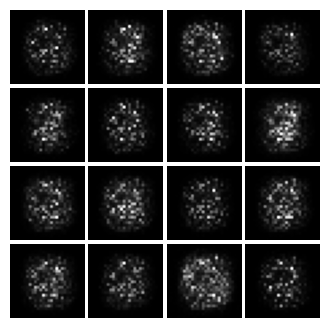

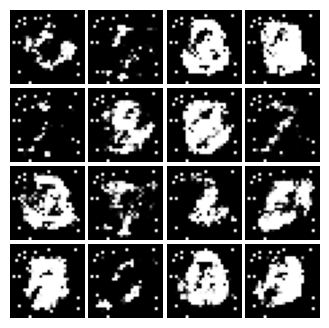

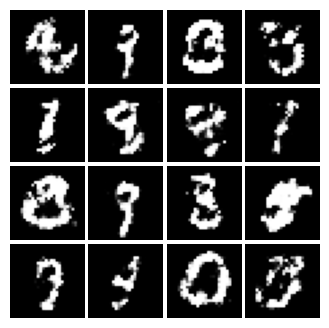

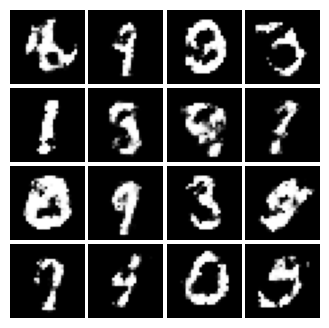

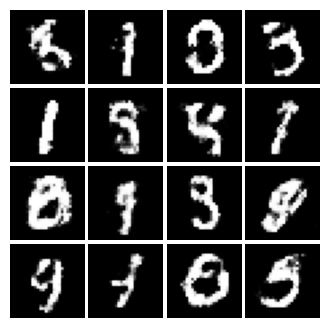

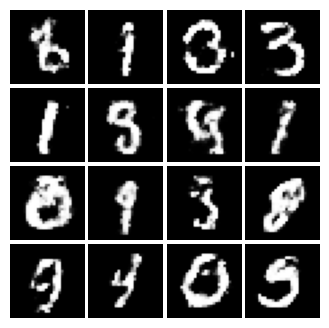

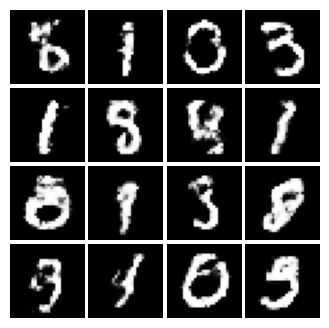

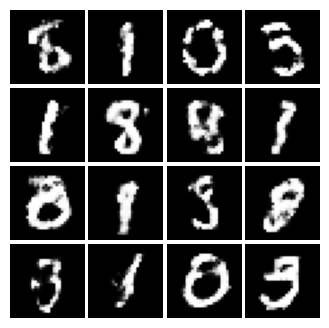

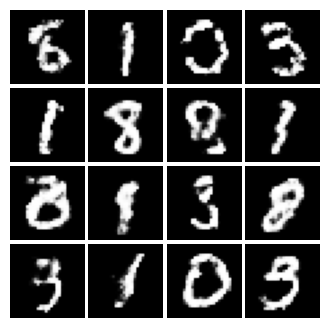

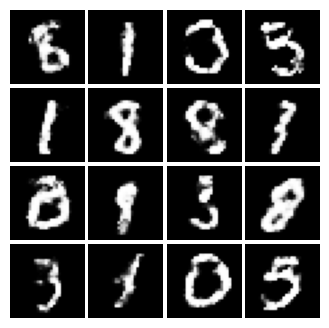

In [ ]:
# label for real & fake data
label_real = torch.full((bs,), real_label, device=device, dtype=torch.float)
label_fake = torch.full((bs,), fake_label, device=device, dtype=torch.float)

#  Noise
fixed_noise = torch.randn(bs, z_size, device=device, dtype=torch.float)

for epoch in range(num_epochs):

    model_G.train()
    model_D.train()

    for i, data in enumerate(data_loader):

        data = data[0].to(device)
        data = data.view(bs, -1)
        # (조건 1) Discriminator의 loss의 변수명은 err_D로 한다.
        # (조건 2) Generator의 loss의 변수명은 err_G로 한다.
        # 판별자 학습
        model_D.zero_grad()

        # 실제 데이터에 대한 판별자 손실
        output_real = model_D(data).view(-1)
        loss_real = criterion(output_real, label_real)
        loss_real.backward()


        # 생성된 데이터에 대한 판별자 손실
        noise = torch.randn(bs, z_size).to(device)
        fake_images = model_G(noise)
        label_fake.fill_(fake_label)

        output_fake = model_D(fake_images.detach()).view(-1)
        loss_fake = criterion(output_fake, label_fake)
        loss_fake.backward()

        # 판별자 총 손실 및 역전파
        err_D = loss_real + loss_fake
        optimizer_D.step()

        # 생성자 학습
        model_G.zero_grad()
        label_real.fill_(real_label)

        # 생성된 데이터에 대한 생성자 손실
        output_fake = model_D(fake_images).view(-1)
        err_G = criterion(output_fake, label_real)

        # 생성자 손실 및 역전파
        err_G.backward()
        optimizer_G.step()



    # Output training stats
    if (epoch+1) % 10 == 0:
        print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f'
              % ((epoch+1), num_epochs, i+1, len(data_loader), err_D.item(), err_G.item()))

    if (epoch) % 50 == 0:
        model_G.eval()
        model_D.eval()
        output = model_G(fixed_noise).detach().cpu().numpy()
        fig = plot(output[:16])


## 2. DCGAN (Deep Convolutional GANs)
> **1. Dataset**
>
>   * CelebA dataset
>   * Resize to (64, 64)
>
> **2. Network**
>
>
>   * **가이드라인**
>      * Generator와 Discriminator에서는 pooling layer를 사용하지 않는다.
>      * Generator와 Discriminator에서는 FCN을 사용하지 않는다.
>      * Generator와 Discriminator 모두 마지막 layer를 제외한 모든 layer에 Batch normalization을 사용한다.
>      * Generator에서는 마지막 layer를 제외한 모든 layer의 activation function으로 ReLU를 사용한다. 마지막 layer에서는 Tanh를 사용한다.
>      * Discriminator에서는 모든 layer의 activation function으로 LeakyReLU를 사용한다.
>
>
>
>   * **Generativor G**
>     * Xavier 초기화를 사용한다.
>       * **nn.init.xavier_uniform_** 로 사용할 수 있다.
>       (실제 논문에서는 다른 초기화 기법을 사용했지만 Xavier 초기화로도 성능이 잘 나온다.)
>     * Latent vector Z 가 input으로 사용된다. (size=100)
>       (Upconvolution으로 size를 (bs, 100, 1, 1)으로 바꿔주어야 한다.)
>     * 논문에서는 Upconvolution의 stride를 5로 했지만 우리 실습에서는 4로 한다.
>     * 마지막 layer를 제외한 모든 layer에 Batch normalization을 사용한다.

>   * **Discriminativor D**
>     * 마찬가지로 Xavier 초기화를 사용한다.
>       * **nn.init.xavier_uniform_** 로 사용할 수 있다.
>     * 입력으로 Real 데이터 또는 Fake 데이터가 사용된다. (size=64x64)
>     * 구조는 upconvolution이 convolution으로 대체되고 마지막 출력 크기가 (bs, 1, 1, 1)로 변경되는 Generativor G의 반대 버전입니다.
>     * 마지막 layer를 제외한 모든 layer에 Batch normalization을 사용한다.


> **3. Loss function**
>  * **Discriminativor D**
>    * Real 데이터를 위해 Binary cross entropy loss(nn.BCELoss())를 이용한다.<br>
      >   : $-{1 \over N} \sum^{N}_{i=1} y_i^{real}log(D(z_i))+(1-y_i^{real})log(1-D(z_i)) $ <br>
>    * Fake 데이터도 마찬가지로 Binary cross entropy loss(nn.BCELoss())를 이용한다. <br>
      >   : $-{1 \over N} \sum^{N}_{i=1} y_i^{fake}log(D(G(z_i)))+(1-y_i^{fake})log(1-D(G(z_i)))$ <br>
>    * $y_i^{real}=1, y_i^{fake}=0$  이다.
>
>
>  * **Generativor G**
>    * Real 데이터에 대해 (사실 이 Real 데이터는 fake이다.) Binary cross entropy loss(nn.BCELoss())를 이용한다. G의 목표는 fake 데이터인 $G(z_i)$를 Real로 속이는 것이기 때문이다.
>
>    $-{1 \over N} \sum^{N}_{i=1} y_i^{real}log(D(G(z_i)))+(1-y_i^{real})log(1-D(G(z_i))) $ <br>
>
>    ($y_i^{real}=1$)

>
> **4. Training Strategy**
>    * GAN을 훈련시키는 알고리즘과 동일하다.
>    * 생성모델 G와 판별모델 D를 교대로 훈련시킨다.
>    * D의 매개변수가 업데이트될 때 G의 역전파가 차단된다.

# 실습 시작

In [ ]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.utils.data
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import os.path as osp

%matplotlib inline

In [ ]:
# Data path
PATH = '/content/celebA/'

# Batch size
bs = 128

# image size
img_size = 64

# latent vector z의 size
z_size = 100

# training epochs
num_epochs = 8

# Learning rate
lr = 0.0002

# Beta1 hyperparameter(for Adam)
beta1 = 0.5

# Real or Fake label
real_label = 1
fake_label = 0

### Dataset loading & Data Loader

In [ ]:
transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.CenterCrop(img_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = dset.ImageFolder(root=PATH,
                           transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=dataset,
                                           batch_size=bs,
                                           shuffle=True,
                                           drop_last=True)

### celebA의 데이터셋을 몇 개만 확인해보자

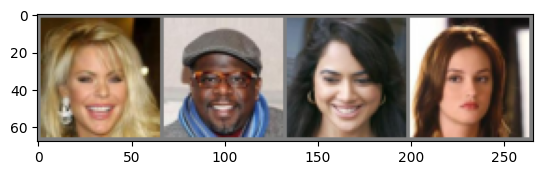

In [ ]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

data_loader_sample = torch.utils.data.DataLoader(dataset=dataset,
                                                 batch_size=4,
                                                 shuffle=True)
inputs, classes = next(iter(data_loader_sample))
out = torchvision.utils.make_grid(inputs)
imshow(out)

### Generative model G
* 'ReLU', 'LeakyReLU', 'Tanh', 'Sigmoid' 중에서 적절한 activation function을
사용하자.
* **upconv2d** 와 **BatchNorm**을 이용하자.
* 6차 강의 실습과 7차 강의 실습를 복습해보면 도움을 받을 수 있을 것이다.
* 또한, Pytorch 공식 홈페이지를 검색해보는 등 다양한 자료를 참고해보자.

In [ ]:
# Generator's hidden layer size (Channels of generator feature) : 64

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.upconv2d1 = nn.ConvTranspose2d( z_size, img_size * 8, 4, 1, 0, bias=False)
        self.upconv2d2 = nn.ConvTranspose2d(img_size * 8, img_size * 4, 4, 2, 1, bias=False)
        self.upconv2d3 = nn.ConvTranspose2d( img_size * 4, img_size * 2, 4, 2, 1, bias=False)
        self.upconv2d4 = nn.ConvTranspose2d( img_size * 2, img_size, 4, 2, 1, bias=False)
        self.upconv2d5 = nn.ConvTranspose2d( img_size, 3, 4, 2, 1, bias=False)
        self.BatchNorm1 = nn.BatchNorm2d(img_size * 8)
        self.BatchNorm2 = nn.BatchNorm2d(img_size * 4)
        self.BatchNorm3 = nn.BatchNorm2d(img_size * 2)
        self.BatchNorm4 = nn.BatchNorm2d(img_size)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

        nn.init.xavier_uniform_(self.upconv2d1.weight)
        nn.init.xavier_uniform_(self.upconv2d2.weight)
        nn.init.xavier_uniform_(self.upconv2d3.weight)
        nn.init.xavier_uniform_(self.upconv2d4.weight)
        nn.init.xavier_uniform_(self.upconv2d5.weight)

    def forward(self, x):
      x = self.upconv2d1(x)
      x = self.BatchNorm1(x)
      x = self.relu(x)

      x = self.upconv2d2(x)
      x = self.BatchNorm2(x)
      x = self.relu(x)

      x = self.upconv2d3(x)
      x = self.BatchNorm3(x)
      x = self.relu(x)

      x = self.upconv2d4(x)
      x = self.BatchNorm4(x)
      x = self.relu(x)

      x = self.upconv2d5(x)
      x = self.tanh(x)

      return x

### Discriminative model D
* 'ReLU', 'LeakyReLU', 'Tanh', 'Sigmoid' 중에서 적절한 activation function을
사용하자.
* **conv2d** 와 **BatchNorm**을 이용하자.
* 6차 강의 실습과 7차 강의 실습를 복습해보면 도움을 받을 수 있을 것이다.
* 또한, Pytorch 공식 홈페이지를 검색해보는 등 다양한 자료를 참고해보자.

In [ ]:
# Discriminator's hidden layer size (Channels of discriminator feature) : 64

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv2d1 = nn.Conv2d(3, img_size, 4, 2, 1, bias=False)
        self.conv2d2 = nn.Conv2d(img_size, img_size * 2, 4, 2, 1, bias=False)
        self.conv2d3 = nn.Conv2d(img_size * 2, img_size * 4, 4, 2, 1, bias=False)
        self.conv2d4 = nn.Conv2d(img_size * 4, img_size * 8, 4, 2, 1, bias=False)
        self.conv2d5 = nn.Conv2d(img_size * 8, 1, 4, 1, 0, bias=False)
        self.BatchNorm1 = nn.BatchNorm2d(img_size * 2)
        self.BatchNorm2 = nn.BatchNorm2d(img_size * 4)
        self.BatchNorm3 = nn.BatchNorm2d(img_size * 8)
        self.leakyrelu = nn.LeakyReLU(0.2, inplace=True)
        self.sigmoid = nn.Sigmoid()

        nn.init.xavier_uniform_(self.conv2d1.weight)
        nn.init.xavier_uniform_(self.conv2d2.weight)
        nn.init.xavier_uniform_(self.conv2d3.weight)
        nn.init.xavier_uniform_(self.conv2d4.weight)
        nn.init.xavier_uniform_(self.conv2d5.weight)

    def forward(self, x):
      x = self.conv2d1(x)
      x = self.leakyrelu(x)

      x = self.conv2d2(x)
      x = self.BatchNorm1(x)
      x = self.leakyrelu(x)

      x = self.conv2d3(x)
      x = self.BatchNorm2(x)
      x = self.leakyrelu(x)

      x = self.conv2d4(x)
      x = self.BatchNorm3(x)
      x = self.leakyrelu(x)

      x = self.conv2d5(x)
      x = self.sigmoid(x)

      return x


In [ ]:
model_G = Generator()
model_D = Discriminator()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_G.to(device)
model_D.to(device)
print(model_G)
print(model_D)

Generator(
  (upconv2d1): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (upconv2d2): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (upconv2d3): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (upconv2d4): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (upconv2d5): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  (BatchNorm1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BatchNorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BatchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (BatchNorm4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (tanh): Tanh()
)
Discriminator(
  (conv2d1): Conv2d(3, 64, kernel_size=(4, 4), stri

### Loss function & optimizer(Adam)

In [ ]:
criterion = nn.BCELoss()

optimizer_G = torch.optim.Adam(model_G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = torch.optim.Adam(model_D.parameters(), lr=lr, betas=(beta1, 0.999))


















gfdgdfhggfg
### function for visualizing picture

In [ ]:
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(64, 64, 3), cmap='Greys_r')
    return fig

### Training GAN
* 모델 G와 D를 교대로 훈련시킨다
* **back-*propagation을* 차단하려면 "output.detach()"를 사용하면 된다.**
* 학습이 완료된 후, 생성된 이미지 샘플을 확인해보자.
* train loop만 작성하면 되며, loss 출력 및 생성 이미지 plot하는 과정은 작성해두었다.(수정하지 말것!)


In [ ]:
label_real = torch.full((bs,), real_label, device=device, dtype=torch.float)
label_fake = torch.full((bs,), fake_label, device=device, dtype=torch.float)

#  The input noise for inference
fixed_noise = torch.randn(bs, z_size, 1, 1, device=device, dtype=torch.float)


for epoch in range(num_epochs):

    model_G.train()
    model_D.train()

    for i, data in enumerate(data_loader):

        data = data[0].to(device)

        ### 여기에 코드 작성
        # (조건 1) Discriminator의 loss의 변수명은 err_D로 한다.
        # (조건 2) Generator의 loss의 변수명은 err_G로 한다.
        model_D.zero_grad()

        # 배치들의 사이즈나 사용할 디바이스에 맞게 조정합니다
        b_size = data.size(0)

        # 진짜 데이터들로 이루어진 배치를 D에 통과시킵니다
        output = model_D(data).view(-1)

        # 손실값을 구합니다
        errD_real = criterion(output, label_real)

        # 역전파의 과정에서 변화도를 계산합니다
        errD_real.backward()
        D_x = output.mean().item()

        ## 가짜 데이터들로 학습을 합니다
        # 생성자에 사용할 잠재공간 벡터를 생성합니다
        noise = torch.randn(b_size, z_size, 1, 1, device=device)

        # G를 이용해 가짜 이미지를 생성합니다
        fake = model_G(noise)
        label_fake.fill_(fake_label)

        # D를 이용해 데이터의 진위를 판별합니다
        output = model_D(fake.detach()).view(-1)
        # D의 손실값을 계산합니다
        errD_fake = criterion(output, label_fake)

        # 역전파를 통해 변화도를 계산합니다. 이때 앞서 구한 변화도에 더합니다(accumulate)
        errD_fake.backward()


        # 가짜 이미지와 진짜 이미지 모두에서 구한 손실값들을 더합니다
        # 이때 errD는 역전파에서 사용되지 않고, 이후 학습 상태를 리포팅(reporting)할 때 사용합니다
        err_D = errD_real + errD_fake
        # D를 업데이트 합니다
        optimizer_D.step()

        ############################
        # (2) G 신경망을 업데이트 합니다: log(D(G(z)))를 최대화 합니다
        ###########################
        model_G.zero_grad()
        label_real.fill_(real_label)  # 생성자의 손실값을 구하기 위해 진짜 라벨을 이용할 겁니다
        # 우리는 방금 D를 업데이트했기 때문에, D에 다시 가짜 데이터를 통과시킵니다.
        # 이때 G는 업데이트되지 않았지만, D가 업데이트 되었기 때문에 앞선 손실값가 다른 값이 나오게 됩니다
        output = model_D(fake).view(-1)
        # G의 손실값을 구합니다
        err_G = criterion(output, label_real)
        # G의 변화도를 계산합니다
        err_G.backward()
        # G를 업데이트 합니다
        optimizer_G.step()


        # Output training stats
        if i % 400 == 0 and i != 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\t'
                  % (epoch, num_epochs, i, len(data_loader),
                     err_D.item(), err_G.item()))

            model_G.eval()
            model_D.eval()
            with torch.no_grad():
                output = model_G(fixed_noise).detach().cpu().numpy()
                output = np.transpose((output+1)/2, (0, 2, 3, 1))
                fig = plot(output[:16])

            model_G.train()
            model_D.train()

Output hidden; open in https://colab.research.google.com to view.